# 5. 미니 프로젝트: 시계열 분류

## 1. 비정상 데이터를 정상 데이터로 만들기

In [98]:
# 먼저 데이터가 저장된 폴더를 연결합시다.
!mkdir -p aiffel/time_series_basic
!cp data/AirPassengers.csv aiffel/time_series_basic/

cp: cannot stat 'data/AirPassengers.csv': No such file or directory


In [99]:
# !pip install tsfresh

In [100]:
# # 라이브러리 버전 충돌을 피하기 위해 런타임을 재시작합니다.
# import os
# os.kill(os.getpid(), 9)

In [101]:
# 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
# air passengers 데이터를 불러옵니다.
ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')

# 'Month' column을 삭제합니다.
# [[YOUR CODE]]
ap.drop('Month', axis=1, inplace=True)

In [103]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


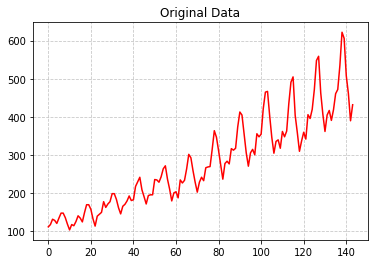

In [104]:
plt.figure()
plt.plot(ap, color='r')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Original Data')
plt.show()

## 2. 분산을 일정하게 만들기 - log transformation

In [105]:
# np.log를 통해서 log transformation
log_transformed = np.log(ap)

In [106]:
log_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


<function matplotlib.pyplot.show(close=None, block=None)>

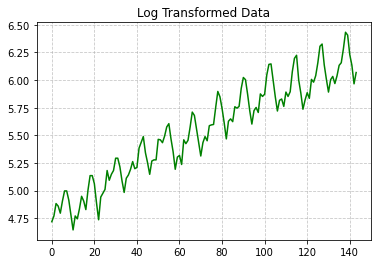

In [107]:
# 분산이 일정해진 것을 눈으로 확인할 수 있습니다.
plt.figure()
plt.plot(log_transformed, color='g')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Log Transformed Data')
plt.show

이전의 증가하던 분산이 통제된 것을 확인 가능

## 3. 차분을 통해 추세 제거하기

In [108]:
# diff() 함수를 통해 간단하게 차분을 수행할 수 있습니다.
diffed = log_transformed.diff()[1:] # 차분을 수행하면 데이터의 길이가 짧아지므로 잘라서 사용하거나 Null값을 제거한 후 사용해야 한다.

In [109]:
diffed

,#Passengers
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
5,0.109484
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


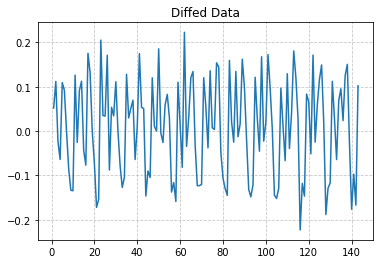

In [110]:
# 커지는 분산과 증가하는 추세를 제거한 air passengers 데이터를 얻을 수 있습니다.
plt.figure()
plt.plot(diffed)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Diffed Data')
plt.show()

## 4. (추가) 계절 차분을 통해 계절성 제거하기
AirPassengers 데이터는 12개월을 주기로 하는 계절성이 포함되어 있습니다.  
이런 경우엔 계절 차분을 통해서 계절성을 데이터에서 제거할 수 있습니다.

In [111]:
# diff에 12라는 값을 넣어주면 주기를 12로 하는 계절 차분을 수행할 수 있습니다.
seasonally_diffed = diffed.diff(12)
# 차분을 하면 데이터가 짧아지기 때문에 빈칸을 제거해야 합니다.
seasonally_diffed.dropna(inplace=True)

In [112]:
# 형태를 확인해봅시다.
seasonally_diffed

,#Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


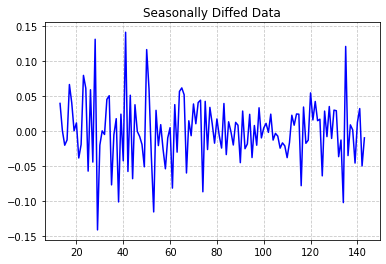

In [113]:
# 아래와 같은 데이터를 얻을 수 있습니다.
plt.figure()
plt.plot(seasonally_diffed, color='b')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Seasonally Diffed Data')
plt.show()

## 5. 검정을 통해 정상성 확인하기 - adfuller

In [114]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x): # adf검정을 위한 함수 정의
    stat, p_value, lags, nobs, crit, icb = adfuller(x) # adfuller 함수를 이용하면 6가지 output이 나옵니다.
    print('ADF statistics')
    print(stat) # ADF 검정 통계량
    print('P-value')
    print(p_value) # P-value

In [115]:
# 계절차분까지 수행한 데이터로 adf 테스트를 수행합니다.
# [[YOUR CODE]]
adf_test(seasonally_diffed)

ADF statistics
-4.4433249418311425
P-value
0.00024859123113838495


#### 유의수준 0.01에서 단위근이 존재한다라는 귀무가설을 기각하고 시계열은 정상적이다라는 대립가설을 채택할 수 있다.

## +) 추가 AirPassengers 데이터 모델 학습 / 평가

In [116]:
seasonally_diffed

,#Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


### RandomForest와 XGBoost - 데이터에 적합하지는 않지만 적용해보기(?)


📊 Random Forest 성능 평가
MSE  : 0.00174
MAE  : 0.03326
RMSE : 0.04176

📊 XGBoost 성능 평가
MSE  : 0.00166
MAE  : 0.03103
RMSE : 0.04076


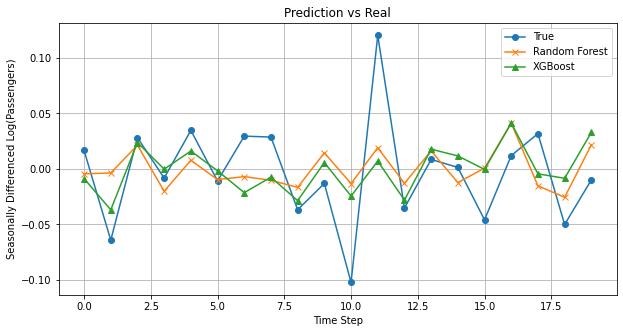

In [117]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


# 1. 지도 학습에 적합한 모델에 맞게 지도 방식으로 변환 함수
def create_supervised(series, lags=12):
    df = pd.DataFrame()
    for i in range(1, lags + 1):
        df[f'lag_{i}'] = series.shift(i)
    df['target'] = series.values
    df = df.dropna()
    return df

# 2. 입력 시계열 데이터
series = seasonally_diffed['#Passengers'].dropna()  # seasonally diffed

# 3. supervised 형태로 변환
df = create_supervised(series, lags=12)
X = df.drop(columns='target')
y = df['target']

# 4. 학습/테스트 분리 (마지막 12개는 테스트용)
# X_train, X_test = X[:-12], X[-12:]
# y_train, y_test = y[:-12], y[-12:]

X_train, X_test = X[:-20], X[-20:]
y_train, y_test = y[:-20], y[-20:]

# X_train, X_test = X[:-30], X[-30:]
# y_train, y_test = y[:-30], y[-30:]

# 5. 모델 정의
models = {
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

# 6. 평가 함수
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False: 제곱근을 씌워 RMSE 값 반환
    print(f"\n📊 {name} 성능 평가")
    print(f"MSE  : {mse:.5f}")
    print(f"MAE  : {mae:.5f}")
    print(f"RMSE : {rmse:.5f}")
    return y_pred

# 7. 학습 및 예측
preds = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds[name] = evaluate_model(name, model, X_test, y_test)

# 8. 시각화
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='True', marker='o')
plt.plot(preds["Random Forest"], label='Random Forest', marker='x')
plt.plot(preds["XGBoost"], label='XGBoost', marker='^')
plt.title("Prediction vs Real")
plt.xlabel("Time Step")
plt.ylabel("Seasonally Differenced Log(Passengers)")
plt.legend()
plt.grid(True)
plt.show()

## 6. 시계열 분류

In [118]:
# ⑥-1 : 데이터 다운로드 및 불러오기
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

# robot exection failures 데이터를 불러옵니다.
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [119]:
# ⑥-2 : 데이터셋 확인(timeseries와 y 확인)
timeseries # id, time을 제외하고 6개 column의 X변수가 나타납니다.

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [120]:
y # true/false가 제시되어 있습니다.

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

### 데이터셋 분리

In [121]:
# ⑥-3 : 데이터셋 가공
def custom_classification_split(x, y, test_size=0.3):  # 수업 때 보았던 custom split 함수
    
    num_true = int(y.sum()*test_size)
    num_false = int((len(y) - y.sum())*test_size)
    
    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()
    
    y_train = y.drop(id_list)
    y_test = y.iloc[id_list].sort_index()
    X_train = x[~x['id'].isin(id_list)]
    X_test = x[x['id'].isin(id_list)]
    
    return X_train, y_train, X_test, y_test

In [122]:
# ⑥-4 : 데이터셋 나누기
# test set의 비율을 0.25로 지정해주세요.
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y, test_size=0.25)

In [123]:
X_train

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
75,6,0,-1,2,57,-10,-3,0
76,6,1,-2,3,60,-12,-4,-1
77,6,2,-1,2,63,-12,-6,1
78,6,3,1,3,62,-11,0,0
79,6,4,-3,2,56,-9,-4,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


### 특징 추출1 - EfficientFCParameters

In [124]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = EfficientFCParameters()

In [125]:
# ⑥-5 : Feature extraction
efficient_features_train = extract_features(
                                    X_train,
                                    column_id='id',
                                    column_sort='time',
                                    default_fc_parameters=settings)

Feature Extraction: 100%|██████████| 402/402 [00:16<00:00, 24.94it/s]


In [126]:
efficient_features_test = extract_features(
                                    X_test, 
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 126/126 [00:04<00:00, 25.76it/s]


In [127]:
# ⑥-6 : impute 를 통한 간단한 전처리
impute(efficient_features_train)

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,2.253858,2.397895,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.589027,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [128]:
impute(efficient_features_test)

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.025326,2.043192,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


### 모델 적용1 - Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=42)

lr_clf.fit(efficient_features_train, y_train)

lr_clf.score(efficient_features_test, y_test).round(5)

0.57143

로지스틱 회귀는 MinimalFCParameters 를 사용했을 때 더 성능이 좋은 것으로 보임.

### 모델 적용2 - Random Forest

In [130]:
# ⑥-7 : RandomForest 사용 및 score 확인
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)

rf_clf.fit(efficient_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [131]:
# test셋에 적합해본 결과
rf_clf.score(efficient_features_test, y_test).round(5)

0.80952

### 모델 적용3 - XGBoost

In [132]:
# ⑥-7 : XGBoost 사용 및 score 확인
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=10, max_depth=3, random_state=42)

# XGBoost 모델을 학습시킵니다.
xgb_clf.fit(efficient_features_train, y_train)

[08:09:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
# XGBoost 모델의 score를 확인합니다.
xgb_clf.score(efficient_features_test, y_test).round(5)

1.0

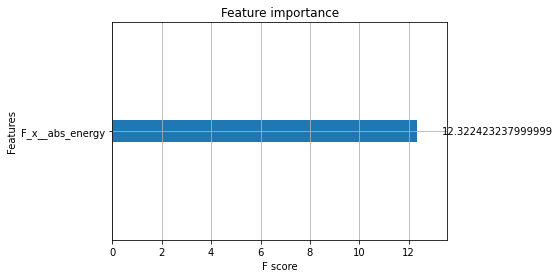

In [134]:
# ⑥-8 : XGBoost plot_importance 확인 및 시각화
# plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인합니다.
xgb.plot_importance(xgb_clf, importance_type='gain')
plt.show()

In [135]:
sum(xgb_clf.feature_importances_ != 0)  # Fx 값의 abs_energy 특징만의 유의미함

1

In [136]:
# ⑥-9 : Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

classification_report(y_test, xgb_clf.predict(efficient_features_test), target_names=['true', 'false'], output_dict=True)

{'true': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16},
 'false': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 21}}

## +) 특징 추출 다른 방식 적용해보기
### 특징 추출2 - MinimalFCParameters

In [137]:
from tsfresh.feature_extraction import MinimalFCParameters

settings = MinimalFCParameters()  
minimal_features_train = extract_features(
                                X_train,
                                column_id='id',
                                column_sort='time',
                                default_fc_parameters=settings 
                            )

minimal_features_test = extract_features(
                                X_test,
                                column_id='id',
                                column_sort='time',
                                default_fc_parameters=settings
                            )

Feature Extraction: 100%|██████████| 126/126 [00:00<00:00, 2789.55it/s]


In [138]:
impute(minimal_features_train)

,F_x__sum_values,F_x__median,F_x__mean,F_x__length,F_x__standard_deviation,F_x__variance,F_x__root_mean_square,F_x__maximum,F_x__absolute_maximum,F_x__minimum,...,T_z__sum_values,T_z__median,T_z__mean,T_z__length,T_z__standard_deviation,T_z__variance,T_z__root_mean_square,T_z__maximum,T_z__absolute_maximum,T_z__minimum
6,-15.0,-1.0,-1.000000,15.0,1.264911,1.600000,1.612452,1.0,3.0,-3.0,...,-3.0,0.0,-0.200000,15.0,0.541603,0.293333,0.577350,1.0,1.0,-1.0
7,-13.0,-1.0,-0.866667,15.0,0.805536,0.648889,1.183216,0.0,3.0,-3.0,...,-1.0,0.0,-0.066667,15.0,0.442217,0.195556,0.447214,1.0,1.0,-1.0
8,-10.0,-1.0,-0.666667,15.0,1.135292,1.288889,1.316561,2.0,2.0,-2.0,...,0.0,0.0,0.000000,15.0,1.032796,1.066667,1.032796,3.0,3.0,-1.0
9,-10.0,-1.0,-0.666667,15.0,1.074968,1.155556,1.264911,2.0,3.0,-3.0,...,3.0,0.0,0.200000,15.0,1.045626,1.093333,1.064581,3.0,3.0,-1.0
10,-14.0,-1.0,-0.933333,15.0,0.249444,0.062222,0.966092,0.0,1.0,-1.0,...,0.0,0.0,0.000000,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-1073.0,-98.0,-71.533333,15.0,36.585729,1338.515556,80.346334,-25.0,110.0,-110.0,...,-232.0,-21.0,-15.466667,15.0,9.659998,93.315556,18.235497,0.0,28.0,-28.0
85,143.0,8.0,9.533333,15.0,4.616877,21.315556,10.592450,19.0,19.0,4.0,...,-52.0,-2.0,-3.466667,15.0,2.156128,4.648889,4.082483,0.0,7.0,-7.0
86,961.0,52.0,64.066667,15.0,38.235179,1461.928889,74.608757,148.0,148.0,21.0,...,-81.0,-8.0,-5.400000,15.0,5.462600,29.840000,7.681146,8.0,10.0,-10.0
87,4509.0,338.0,300.600000,15.0,57.753268,3335.440000,306.097697,342.0,342.0,171.0,...,475.0,35.0,31.666667,15.0,9.903983,98.088889,33.179311,44.0,44.0,13.0


In [139]:
impute(minimal_features_test)

,F_x__sum_values,F_x__median,F_x__mean,F_x__length,F_x__standard_deviation,F_x__variance,F_x__root_mean_square,F_x__maximum,F_x__absolute_maximum,F_x__minimum,...,T_z__sum_values,T_z__median,T_z__mean,T_z__length,T_z__standard_deviation,T_z__variance,T_z__root_mean_square,T_z__maximum,T_z__absolute_maximum,T_z__minimum
1,-14.0,-1.0,-0.933333,15.0,0.249444,0.062222,0.966092,0.0,1.0,-1.0,...,0.0,0.0,0.000000,15.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,-13.0,-1.0,-0.866667,15.0,0.956847,0.915556,1.290994,0.0,3.0,-3.0,...,-4.0,0.0,-0.266667,15.0,0.442217,0.195556,0.516398,0.0,1.0,-1.0
3,-10.0,-1.0,-0.666667,15.0,0.596285,0.355556,0.894427,1.0,1.0,-1.0,...,-4.0,0.0,-0.266667,15.0,0.442217,0.195556,0.516398,0.0,1.0,-1.0
4,-6.0,0.0,-0.400000,15.0,0.952190,0.906667,1.032796,1.0,2.0,-2.0,...,-5.0,0.0,-0.333333,15.0,0.596285,0.355556,0.683130,1.0,1.0,-1.0
5,-9.0,-1.0,-0.600000,15.0,0.879394,0.773333,1.064581,2.0,2.0,-2.0,...,-2.0,0.0,-0.133333,15.0,0.618241,0.382222,0.632456,1.0,1.0,-1.0
19,99.0,1.0,6.600000,15.0,19.071095,363.706667,20.180849,69.0,69.0,-12.0,...,6.0,0.0,0.400000,15.0,0.952190,0.906667,1.032796,2.0,2.0,-1.0
20,155.0,-1.0,10.333333,15.0,46.799810,2190.222222,47.927028,185.0,185.0,-10.0,...,10.0,0.0,0.666667,15.0,3.112698,9.688889,3.183290,12.0,12.0,-2.0
21,-171.0,-1.0,-11.400000,15.0,31.140113,969.706667,33.161222,13.0,119.0,-119.0,...,80.0,0.0,5.333333,15.0,25.029760,626.488889,25.591665,98.0,98.0,-14.0
22,102.0,-1.0,6.800000,15.0,28.291813,800.426667,29.097537,112.0,112.0,-5.0,...,-31.0,0.0,-2.066667,15.0,7.279805,52.995556,7.567474,1.0,29.0,-29.0
23,67.0,-3.0,4.466667,15.0,26.196353,686.248889,26.574424,95.0,95.0,-29.0,...,11.0,0.0,0.733333,15.0,2.792052,7.795556,2.886751,6.0,6.0,-4.0


In [140]:
## 모델 적용
# 1. Logistic Regression
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(minimal_features_train, y_train)

# 2. Random Forest
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
rf_clf.fit(minimal_features_train, y_train)

# 3. XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=10, max_depth=3, random_state=42)
xgb_clf.fit(minimal_features_train, y_train)

# 결과
print('Logiscit Regression: ', lr_clf.score(minimal_features_test, y_test).round(5))
print('Random Forest: ', rf_clf.score(minimal_features_test, y_test).round(5))
print('XGBoost: ', xgb_clf.score(minimal_features_test, y_test).round(5))

[08:09:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Logiscit Regression:  0.66667
Random Forest:  0.95238
XGBoost:  1.0


### 특징 추출3 - ConprehensiveFCParameters

In [141]:
from tsfresh.feature_extraction import ComprehensiveFCParameters

settings = ComprehensiveFCParameters()
comprehensive_features_train = extract_features(
                                X_train,
                                column_id='id',
                                column_sort='time',
                                default_fc_parameters=settings 
                            )

comprehensive_features_test = extract_features(
                                X_test,
                                column_id='id',
                                column_sort='time',
                                default_fc_parameters=settings
                            )

Feature Extraction: 100%|██████████| 126/126 [00:05<00:00, 24.91it/s]


In [142]:
impute(comprehensive_features_train)

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,2.253858,2.397895,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.589027,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [143]:
impute(comprehensive_features_test)

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.025326,2.043192,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


In [144]:
## 모델 적용
# 1. Logistic Regression
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(comprehensive_features_train, y_train)

# 2. Random Forest
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
rf_clf.fit(comprehensive_features_train, y_train)

# 3. XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=10, max_depth=3, random_state=42)
xgb_clf.fit(comprehensive_features_train, y_train)

# 결과
print('Logiscit Regression: ', lr_clf.score(comprehensive_features_test, y_test).round(5))
print('Random Forest: ', rf_clf.score(comprehensive_features_test, y_test).round(5))
print('XGBoost: ', xgb_clf.score(comprehensive_features_test, y_test).round(5))

[08:09:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Logiscit Regression:  0.57143
Random Forest:  0.95238
XGBoost:  1.0


### 특징 추출 방식별 스코어


| 추출 방식 | 모델 | 스코어 |
|--------------|---------|-----------|
| Efficient| 로지스틱 회귀 | 0.57143 | 
| Efficient | 랜덤 포레스트 | 0.80952 | 
| Efficient | XGBoost | 1.0 |
| Minimal | 로지스틱 회귀 | 0.66667 | 
| Minimal | 랜덤 포레스트 | 0.95238 | 
| Minimal | XGBoost | 1.0 |
| Comprehensive | 로지스틱회귀 | 0.57143 | 
| Comprehensive | 랜덤 포레스트 | 0.95238 | 
| Comprehensive | XGBoost | 1.0 |

### 성능이 전반적으로 가장 좋은 MinimalFCParameters 에 대한 Classification report

In [145]:
## 모델 적용
# 1. Logistic Regression
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(minimal_features_train, y_train)

# 2. Random Forest
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
rf_clf.fit(minimal_features_train, y_train)

# 3. XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=10, max_depth=3, random_state=42)
xgb_clf.fit(minimal_features_train, y_train)

# 결과
print('Logiscit Regression: ', lr_clf.score(minimal_features_test, y_test).round(5))
print('Random Forest: ', rf_clf.score(minimal_features_test, y_test).round(5))
print('XGBoost: ', xgb_clf.score(minimal_features_test, y_test).round(5))

[08:09:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Logiscit Regression:  0.66667
Random Forest:  0.95238
XGBoost:  1.0


In [146]:
print('로지스틱 회귀: ')
print(classification_report(y_test, lr_clf.predict(minimal_features_test), target_names=['true', 'false'], output_dict=True))
print('--'*20)
print('랜덤 포레스트: ')
print(classification_report(y_test, rf_clf.predict(minimal_features_test), target_names=['true', 'false'], output_dict=True))
print('--'*20)
print('XGBoost: ')
print(classification_report(y_test, xgb_clf.predict(minimal_features_test), target_names=['true', 'false'], output_dict=True))

로지스틱 회귀: 
{'true': {'precision': 1.0, 'recall': 0.5625, 'f1-score': 0.72, 'support': 16}, 'false': {'precision': 0.4166666666666667, 'recall': 1.0, 'f1-score': 0.5882352941176471, 'support': 5}, 'accuracy': 0.6666666666666666, 'macro avg': {'precision': 0.7083333333333334, 'recall': 0.78125, 'f1-score': 0.6541176470588235, 'support': 21}, 'weighted avg': {'precision': 0.861111111111111, 'recall': 0.6666666666666666, 'f1-score': 0.6886274509803921, 'support': 21}}
----------------------------------------
랜덤 포레스트: 
{'true': {'precision': 1.0, 'recall': 0.9375, 'f1-score': 0.967741935483871, 'support': 16}, 'false': {'precision': 0.8333333333333334, 'recall': 1.0, 'f1-score': 0.9090909090909091, 'support': 5}, 'accuracy': 0.9523809523809523, 'macro avg': {'precision': 0.9166666666666667, 'recall': 0.96875, 'f1-score': 0.9384164222873901, 'support': 21}, 'weighted avg': {'precision': 0.9603174603174603, 'recall': 0.9523809523809523, 'f1-score': 0.9537774053903088, 'support': 21}}
---------